In [1]:
#https://github.com/imasha1/DMHR #Github URL

import pandas
import pandasql
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as dates
from scipy.stats import norm
import numpy as np
sql = pandasql.PandaSQL()

#Need to import Pandas library, PandaSQL, Matplotlib, Numpys etc in Jupyter Notebook so it’s loaded into the memory and is available to work with
#Add ‘as plt’ and ‘as np’ so can access Plotting library and Numpys just by writing ‘plt.command’ etc every time you need to use it.
#A date in Python is not a data type of its own, so need to import it as datetime


C:\Users\imash\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
import sys
#sys is system-specific parameters and functions. This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter

In [3]:
def find_patients_registered(practice_codes, practice_patient_data):
  return sql('select practice_code, number_of_patients from practice_codes left join practice_patient_data on practice_code = code')
#Def defines a funtion, in this case function is defined as to find patients registered, with the parameters being practice codes and patient data
#This code is using and Pandas and PandaSQL 
#The return statement causes your find patients registered function to exit and hand back a value to its caller with parameters being select practice codes, number of patients from practice codes left join practice patient data on practice code

In [4]:
def find_prescriptions_count(practice_codes, practice_prescription_data):
  return sql('select practice_code, sum(quantity) as quantity from practice_codes left join practice_prescription_data on practice_code = practice group by practice_code')
#Def defines a funtion, in this case function is defined as to find prescriptions count, with the parameters being practice codes and practice prescription data
#This code is using and Pandas and PandaSQL 
#The return statement causes your find prescriptions count function to exit and hand back a value to its caller with parameters being select practice codes, total quantity from practice codes left join practice data on practice codes equalling practice group by practice code

In [5]:
def find_prescriptions_cost(practice_codes, practice_prescription_data):
  return sql('select practice_code, sum([ACT COST   ]) as cost from practice_codes left join practice_prescription_data on practice_code = practice group by practice_code')
#Def defines a function, in this case function is defined as to find prescriptions cost, with the parameters being practice codes and practice prescription data
#This code is using and Pandas and PandaSQL 
#The return statement causes your find prescriptions cost function to exit and hand back a value to its caller with parameters being select practice codes, total quantity as cost from practice codes left join practice prescription data on practice code equalling practice group by practice code


In [6]:
#the top 10 most frequent drugs prescribed
#Def defines a function, in this case function is defined as to find top 10 most frequent drugs, with the parameters being practice codes and practice prescription data
#This code is using and Pandas and PandaSQL 

#The return statement causes your find top 10 most frequent drugs function to exit and hand back a value to its caller with parameters being select practice codes, BNF name, total quantity as quantity from practice codes left join practice prescription data on practice code equalling practice group by practice code, name order by practice code and quantity in ascending order
def find_top_10_frequent_drugs(practice_codes, practice_prescription_data):
  return sql('select practice_code, [BNF NAME                                    ] as name, sum([quantity]) as quantity from practice_codes left join practice_prescription_data on practice_code = practice group by practice_code, name order by practice_code, quantity DESC')

In [7]:
#the bottom 10 least frequent drugs prescribed
def find_least_10_frequent_drugs(practice_codes, practice_prescription_data):
  return sql('select practice_code, [BNF NAME                                    ] as name, sum([quantity]) as quantity from practice_codes left join practice_prescription_data on practice_code = practice group by practice_code, name order by practice_code, quantity ASC')
#Def defines a function, in this case function is defined as to find top 10 frequent drugs, with the parameters being practice codes and practice prescription data
#This code is using and Pandas and PandaSQL 
#The return statement causes your find top 10 frequent drugs function to exit and hand back a value to its caller with parameters being select practice codes, BNF name, total quantity as quantity from practice codes left join practice prescription data on practice code equalling practice group by practice code, name order by practice code and quantity in descending order


In [8]:
def find_prescriptions_count_and_cost_cardiovascular(practice_prescription_data):
  # needs checking
  cardiovascular_drugs = pandas.DataFrame([{"name": "%%Digoxin%%"}, {"name": "%%Indapamide%%"}, {"name": "%%Bendroflumethiazide%%"}, {"name": "%%Furosemide%%"}, {"name": "%%Bumetanide%%"}, {"name": "%%Amiloride%%"}, {"name": "%%Eplerenone%%"}, {"name": "%%Spironolactone%%"}, {"name": "%%Co-amilofruse%%"}, {"name": "%%Amiodarone%%"}, {"name": "%%Flecainide%%"}, {"name": "%%Dronedarone%%"}, {"name": "%%Bisoprolol%%"}, {"name": "%%Carvedilol%%"}, {"name": "%%Labetalol%%"}, {"name": "%%Propranolol%%"}, {"name": "%%Atenolol%%"}, {"name": "%%Hydralazine%%"}, {"name": "%%Methyldopa%%"}, {"name": "%%Moxonidine%%"}, {"name": "%%Doxazosin%%"}, {"name": "%%Sacubitril%%"}, {"name": "%%Valsartan%%"}, {"name": "%%Lisinopril%%"}, {"name": "%%Perindopril erbumine%%"}, {"name": "%%Ramipril%%"}, {"name": "%%Candesartan%%"}, {"name": "%%Irbesartan%%"}, {"name": "%%Losartan%%"}, {"name": "%%Valsartan%%"}, {"name": "%%Glyceryl%%"}, {"name": "%%Isosorbide%%"}, {"name": "%%Amlodipine%%"}, {"name": "%%Lercanidipine%%"}, {"name": "%%Diltiazem%%"}, {"name": "%%Verapamil%%"}, {"name": "%%Ivabradine%%"}, {"name": "%%Nicorandil%%"}, {"name": "%%Ranolazine%%"}, {"name": "%%Naftidrofuryl%%"}, {"name": "%%Bivalirudin%%"}, {"name": "%%Apixaban%%"}, {"name": "%%Dabigatran%%"}, {"name": "%%Edoxaban%%"}, {"name": "%%Rivaroxaban%%"}, {"name": "%%Warfarin%%"}, {"name": "%%Acenocoumarol%%"}, {"name": "%%Idarucizumab%%"}, {"name": "%%Aspirin%%"}, {"name": "%%Clopidogrel%%"}, {"name": "%%Dipyridamole%%"}, {"name": "%%Prasugrel%%"}, {"name": "%%Ticagrelor%%"}, {"name": "%%Aspirin%%"}, {"name": "%%dipyridamole%%"}, {"name": "%%Tranexamic acid%%"}, {"name": "%%Atorvastatin%%"}, {"name": "%%Simvastatin%%"}, {"name": "%%Rosuvastatin%%"}, {"name": "%%Pravastatin%%"}, {"name": "%%Colestyramine%%"}, {"name": "%%Ezetimibe%%"}, {"name": "%%Fenofibrate%%"}, {"name": "%%Alirocumab%%"}, {"name": "%%Evolocumab%%"}])
  return sql('select sum(quantity) as quantity, sum([ACT COST   ]) as cost from practice_prescription_data where (select count(*) as count from cardiovascular_drugs where [BNF NAME                                    ] like name) > 0')
#Def defines a function, in this case function is defined as to find prescriptions number and cost of cardiovascular drugs, with the parameters being practice prescription data
#This code is using and Pandas and PandaSQL 
#defining cardiovascular_drugs as all data frames that has said drugs included – Digoxin, Indapamide, Bendroflumethiazide, Furosemide, Bumetanide, Amiloride, Eplerone, Spironolactone, Co-amilofruse etc.
#The return statement causes your find prescriptions number and cost of cardiovascular drugs function to exit and hand back a value to its caller with parameters being ‘select total quantity’ as quantity, ‘total of cost’ as cost from practice prescription data select count as count from cardiovascular drugs where BNF name like relevant drug names.


In [9]:
def find_prescriptions_count_and_cost_antidepressants(practice_prescription_data):
  # needs checking
  antidepressants_drugs = pandas.DataFrame([{"name": "%%Amitriptyline hydrochloride%%"}, {"name": "%%Clomipramine hydrochloride%%"}, {"name": "%%Dosulepin hydrochloride%%"}, {"name": "%%Doxepin%%"}, {"name": "%%Imipramine hydrochloride%%"}, {"name": "%%Lofepramine%%"}, {"name": "%%Mianserin hydrochloride%%"}, {"name": "%%Nortriptyline%%"}, {"name": "%%Trazodone hydrochloride%%"}, {"name": "%%Trimipramine%%"}, {"name": "%%Isocarboxazid%%"}, {"name": "%%Moclobemide%%"}, {"name": "%%Phenelzine%%"}, {"name": "%%Tranylcypromine%%"}, {"name": "%%Citalopram%%"}, {"name": "%%Escitalopram%%"}, {"name": "%%Fluoxetine%%"}, {"name": "%%Fluvoxamine maleate%%"}, {"name": "%%Paroxetine%%"}, {"name": "%%Sertraline%%"}, {"name": "%%Agomelatine%%"}, {"name": "%%Duloxetine%%"}, {"name": "%%Flupentixol%%"}, {"name": "%%Mirtazapine%%"}, {"name": "%%Reboxetine%%"}, {"name": "%%Tryptophan%%"}, {"name": "%%Venlafaxine%%"}])
  return sql('select sum(quantity) as quantity, sum([ACT COST   ]) as cost from practice_prescription_data where (select count(*) as count from antidepressants_drugs where [BNF NAME                                    ] like name) > 0')
#Def defines a function, in this case function is defined as to find prescriptions number and cost of antidepressants drugs, with the parameters being practice prescription data
#This code is using and Pandas and PandaSQL 
#defining antidepressants_drugs as all data frames that has relevant antidepressant drugs included.
#The return statement causes your find prescriptions number and cost of antidepressants drugs function to exit and hand back a value to its caller with parameters being ‘select total quantity’ as quantity, ‘total of cost’ as cost from practice prescription data select count as count from antidepressants drugs where BNF name like relevant drug names.


In [10]:
practice_prescription_data = pandas.read_csv('C:\\Users\\imash\\Downloads\\T201804PDPI+BNFT.CSV')
#importing practice prescription data from NHS as panda and naming it as practice_prescription_data

In [11]:
practice_patient_data = pandas.read_csv('C:\\Users\\imash\\Downloads\\gp-reg-pat-prac-all.CSV')
#importing practice patient data from NHS as panda and naming it as practice_patient_data

In [12]:
practice_location_data = pandas.read_csv('C:\\Users\\imash\\Downloads\\T201804ADDR+BNFT.CSV', names=['date', 'practice_code', '_1', '_2', '_3', 'city', 'county', 'post_code'])
#importing practice location data from NHS as panda and naming it as practice_location_data and also adding headings to each coloumns to make address clearer.

In [13]:
# Identify all GP practices located in London, by using PandaSQL to search and select all data where the word 'London' was included in city or county
london_practice_codes = sql('select practice_code from practice_location_data where city like "%%london%%" or county like "%%london%%"')

In [14]:
# LONDON: the total number of patients registered with parameters as london practice codes and practice prescription data

find_patients_registered(london_practice_codes, practice_patient_data)

,practice_code,NUMBER_OF_PATIENTS
0,E82113,4148.0
1,E83003,8911.0
2,E83005,6224.0
3,E83006,6885.0
4,E83007,5706.0
5,E83008,7900.0
6,E83009,10822.0
7,E83010,11407.0
8,E83011,8116.0
9,E83013,6505.0


In [15]:
# LONDON: the total number of prescriptions with parameters as london practice codes and practice prescription data
find_prescriptions_count(london_practice_codes, practice_prescription_data)

,practice_code,quantity
0,E82113,338001
1,E83003,950148
2,E83005,578742
3,E83006,618685
4,E83007,531001
5,E83008,663524
6,E83009,913246
7,E83010,1230721
8,E83011,977745
9,E83013,638429


In [16]:
# LONDON: the total actual cost of these prescriptions with parameters as london practice codes and practice prescription data
find_prescriptions_cost(london_practice_codes, practice_prescription_data)

,practice_code,cost
0,E82113,30991.45
1,E83003,89607.38
2,E83005,47240.62
3,E83006,54746.99
4,E83007,53459.56
5,E83008,71808.73
6,E83009,92674.43
7,E83010,100409.55
8,E83011,74748.34
9,E83013,49177.60


In [17]:
# LONDON: the top 10 most frequent drugs prescribed with parameters as london practice codes and practice prescription data
find_top_10_frequent_drugs(london_practice_codes, practice_prescription_data)

,practice_code,name,quantity
0,E82113,Fortisip Compact_Liq (8 Flav),14000
1,E82113,Ensure Plus_Milkshake Style Liq (9 Flav),12200
2,E82113,Ensure TwoCal_Liq (4 Flav),11200
3,E82113,Ensure Compact_Liq (4 Flav),11000
4,E82113,Lactulose_Soln 3.1g-3.7g/5ml,10700
5,E82113,Metformin HCl_Tab 500mg,9751
6,E82113,Zerobase Crm (Appl),8500
7,E82113,Zerocream (Appl),6100
8,E82113,Neocate LCP_Pdr,5600
9,E82113,Omeprazole_Cap E/C 20mg,5334


In [18]:
# LONDON: the bottom 10 less frequent drugs prescribed with parameters as london practice codes and practice precription data
find_least_10_frequent_drugs(london_practice_codes, practice_prescription_data)

,practice_code,name,quantity
0,E82113,3m Health Care_Cavilon No Sting Barrier,1
1,E82113,Acti-Fast 2-Way Stch 10.75cmx3m(Yell)Stk,1
2,E82113,Activa Leg Ulcer Hose Kit Med O/T Compre,1
3,E82113,BioXtra Dry Mth Oral gel 40ml (App),1
4,E82113,Ciclesonide_Inh 160mcg (60 D) CFF,1
5,E82113,Clenil Modulite_Inha 50mcg (200D),1
6,E82113,CliniFast 10.75cm x 5m (Yellow) Stkntte,1
7,E82113,Colifoam_Foam Aero Enem 10% 20.8g (14 D),1
8,E82113,Coloplast SpeediCath Compact Plus Fle 10,1
9,E82113,Comfifast 10.75cm x 5m (Yellow)Stkntte E,1


In [19]:
# Identify all GP practices located in Cambridge by using PandaSQL to search and select all data where the word 'cambridge' was included in city or county
cambridge_practice_codes = sql('select practice_code from practice_location_data where city like "%%cambridge%%" or county like "%%cambridge%%"')

In [20]:
# CAMBRIDGE: the total number of patients registered with parameters as cambridge practice codes and practice prescription data
find_patients_registered(cambridge_practice_codes, practice_patient_data)

,practice_code,NUMBER_OF_PATIENTS
0,C83026,23895.0
1,D81001,12057.0
2,D81002,16939.0
3,D81003,9927.0
4,D81004,9772.0
5,D81005,14941.0
6,D81007,9236.0
7,D81008,19605.0
8,D81009,9071.0
9,D81010,11943.0


In [21]:
# CAMBRIDGE: the total number of prescriptions with parameters as cambridge practice codes and practice prescription data
find_prescriptions_count(cambridge_practice_codes, practice_prescription_data)

,practice_code,quantity
0,C83026,2887247
1,D81001,575098
2,D81002,890112
3,D81003,736032
4,D81004,1108492
5,D81005,600923
6,D81007,1283177
7,D81008,2670335
8,D81009,833888
9,D81010,1628287


In [22]:
# CAMBRIDGE: the total actual cost of these prescriptions with parameters as cambridge practice codes and practice prescription data
find_prescriptions_cost(cambridge_practice_codes, practice_prescription_data)

,practice_code,cost
0,C83026,297645.49
1,D81001,65873.09
2,D81002,90156.76
3,D81003,71266.77
4,D81004,111906.74
5,D81005,63413.35
6,D81007,111265.22
7,D81008,251141.55
8,D81009,84364.61
9,D81010,150453.19


In [23]:
# CAMBRIDGE: the top 10 most frequent drugs prescribed with parameters as cambridge practice codes and practice prescription data
find_top_10_frequent_drugs(cambridge_practice_codes, practice_prescription_data)

,practice_code,name,quantity
0,C83026,Fresubin 2kcal_Drink (6 Flav),103200
1,C83026,Fortisip Compact_Liq (8 Flav),99000
2,C83026,Fortisip Bottle_Liq (8 Flav),66400
3,C83026,Lactulose_Soln 3.1g-3.7g/5ml,58700
4,C83026,Nutrison Pack_Energy,58500
5,C83026,Paracet_Tab 500mg,58346
6,C83026,Dermol 500_Lot,55500
7,C83026,Gaviscon Advance_Liq (Aniseed) (Reckitt),51550
8,C83026,Omeprazole_Cap E/C 20mg,46034
9,C83026,Fresubin Energy_Liq (8 Flav),44000


In [24]:
# CAMBRIDGE: the bottom 10 less frequent drugs prescribed with parameters as cambridge practice codes and practice prescription data
find_least_10_frequent_drugs(cambridge_practice_codes, practice_prescription_data)

,practice_code,name,quantity
0,C83026,Picato_Gel 500mcg/g,0
1,C83026,3m Health Care_Cavilon No Sting 3ml Barr,1
2,C83026,Acapella Oscillating Positive Expiratory,1
3,C83026,Activa Leg Ulcer Hose Kit Lge Clsd Toe C,1
4,C83026,Activon Tulle 5cm x 5cm Manuka Honey Ste,1
5,C83026,Aderma Dermal Pad 10 x 10 x 1.2cm Sheet,1
6,C83026,AirFluSal Forspiro_Inh 500/50mcg (60D),1
7,C83026,Airomir_Inha 100mcg (200 D),1
8,C83026,Ambirix_Vac 720u/20mcg/ml 1ml Pfs,1
9,C83026,Aspen_Sorbaderm No-Sting Barrier Film Sp,1


In [25]:
# cardiovascular: total number of prescriptions and their total actual cost across all practices for drugs
find_prescriptions_count_and_cost_cardiovascular(practice_prescription_data)

,quantity,cost
0,865947844,7.509311e+07


In [26]:
# antidepressants: total number of prescriptions and their total actual cost across all practices for drugs
find_prescriptions_count_and_cost_antidepressants(practice_prescription_data)

,quantity,cost
0,146956907,1.241988e+07


In [28]:
# visualize the monthly total spending per registered patients using a scatterplot and provide a trend line
all_practice_codes = sql('select practice_code from practice_location_data')

In [29]:
number_of_patients = find_patients_registered(all_practice_codes, practice_patient_data)
#identifying patients registered using all practice codes, and practice patient data as parameters, and defined as number of patients for plot

In [30]:
#identifying total cost for plot
total_cost = find_prescriptions_cost(all_practice_codes, practice_prescription_data)

In [31]:
plot_data = sql("select p.number_of_patients as number_of_patients, c.cost as cost, (c.cost / p.number_of_patients) as relative_cost from all_practice_codes a left join number_of_patients p on a.practice_code = p.practice_code left join total_cost c on c.practice_code = a.practice_code where c.cost is not null and p.number_of_patients is not null")

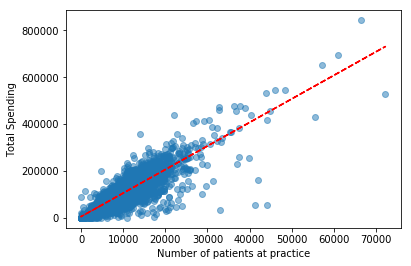

In [32]:
xs = plot_data.number_of_patients #plot number of patients on x axis
ys = plot_data.cost #plot total spending/data cost on y axis
plt.scatter(xs, ys, alpha=0.5)
z = np.polyfit(xs, ys, 1)
p = np.poly1d(z)
plt.xlabel('Number of patients at practice')
plt.ylabel('Total Spending')
plt.plot(xs,p(xs),"r--")
plt.show()

C:\Users\imash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


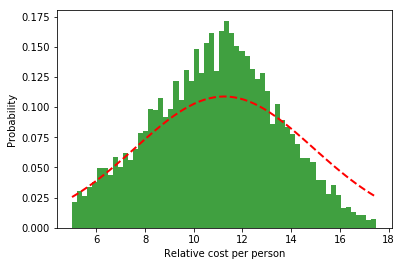

In [33]:
# generate a histogram for relative spending for all practices and fit a Gaussian (normal) curve
n, bins, patches = plt.hist(plot_data.relative_cost, 60, range=(5, 17.5), density=True, facecolor='green', alpha=0.75)
(mu, sigma) = norm.fit(bins)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Relative cost per person')
plt.ylabel('Probability')
plt.show()

In [9]:
#Assignment B


def find_population_and_deaths_neoplasms(population_data, mortality_data, country_code):
  return sql('select p.pop1 as population, sum(m.deaths1) as deaths from population_data p left join mortality_data m on p.country = m.country where m.year=2010 and p.year=2010 and m.cause >= "C00" and m.cause <= "D48" and p.country = ' + str(country_code) + ' group by population')

#Def defines a funtion, in this case function is defined as to find population and deaths neoplasms, with the parameters being population data, mortality data and country code
#This code is using and Pandas and PandaSQL 
#The return statement causes your find population and deaths neoplasms function to exit and hand back a value to its caller 

def find_population_and_deaths(population_data, mortality_data, country_code):
  return sql('select p.pop1 as population, sum(m.deaths1) as deaths from population_data p left join mortality_data m on p.country = m.country where m.year=2010 and p.year=2010 and p.country = ' + str(country_code) + ' group by population')

#Def defines a funtion, in this case function is defined as to find population and deaths, with the parameters being population data, mortality data and country code
#This code is using and Pandas and PandaSQL 
#The return statement causes your find population and deaths function to exit and hand back a value to its caller 


def find_country_code(country_code_data, country_name):
  return sql('select country from country_code_data where name = "' + country_name + '"').country[0]

#Def defines a funtion, in this case function is defined as to find country code, with the parameters being country code data and country name
#This code is using and Pandas and PandaSQL 
#The return statement causes your find country code function to exit and hand back a value to its caller 


low_memory=False







In [10]:
mortality_data = pandas.read_csv('Morticd10') # combine part 1 and part 2 mortality datan files manually beforehand on disk then import mortality data from WHO as panda and naming it as mortality_data
population_data = pandas.read_csv('pop') #importing population data from WHO as panda and naming it as population_data
country_code_data = pandas.read_csv('country_codes') #importing country codes data from WHO as panda and naming it as country_code_data
iceland_country_code = find_country_code(country_code_data, 'Iceland') #Identifying country code using Panda and PandaSQL
italy_country_code = find_country_code(country_code_data, 'Italy')
new_zealand_country_code = find_country_code(country_code_data, 'New Zealand')
australia_country_code = find_country_code(country_code_data, 'Australia')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# identifyin iceland population and the total number of deaths using pandasql
find_population_and_deaths(population_data, mortality_data, iceland_country_code)


,population,deaths
0,158070.0,4038
1,159971.0,4038


In [12]:
# identifying italy population and the total number of deaths using pandasql
find_population_and_deaths(population_data, mortality_data, italy_country_code)


,population,deaths
0,29350339.0,1169230
1,31133047.0,1169230


In [14]:
# identifying new_zealand population and the total number of deaths using pandasql
find_population_and_deaths(population_data, mortality_data, new_zealand_country_code)


,population,deaths
0,2144390.0,57298
1,2222970.0,57298


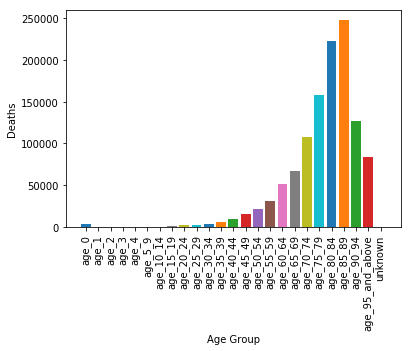

In [15]:
# What was the distribution of deaths (all causes, all years) by age group in Italy
plot_data = sql('select sum(deaths2) as age_0, sum(deaths3) as age_1, sum(deaths4) as age_2, sum(deaths5) as age_3, sum(deaths6) as age_4, sum(deaths7) as age_5_9, sum(deaths8) as age_10_14, sum(deaths9) as age_15_19, sum(deaths10) as age_20_24, sum(deaths11) as age_25_29, sum(deaths12) as age_30_34, sum(deaths13) as age_35_39, sum(deaths14) as age_40_44, sum(deaths15) as age_45_49, sum(deaths16) as age_50_54, sum(deaths17) as age_55_59, sum(deaths18) as age_60_64, sum(deaths19) as age_65_69, sum(deaths20) as age_70_74, sum(deaths21) as age_75_79, sum(deaths22) as age_80_84, sum(deaths23) as age_85_89, sum(deaths24) as age_90_94, sum(deaths25) as age_95_and_above, sum(deaths26) as unknown from mortality_data where year=2010 and country = ' + str(italy_country_code))
for age_group in plot_data:
  plt.bar(age_group, plot_data[age_group])
plt.ylabel('Deaths')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.show()

#below is visualisation of distribution of death by age group in italy.

In [16]:
# Generate a table with the cause of death, the number of deaths, and the proportion of overall deaths
table_data = sql('select cause as cause, sum(deaths1) as deaths from mortality_data where cause >= "C00" and cause <= "D48" and year = 2010 and country = ' + str(italy_country_code) + ' group by cause order by deaths DESC')
total_deaths = float(sql('select sum(deaths) as total_deaths from table_data').total_deaths)
table_data = sql('select *, (deaths / ' + str(total_deaths) + ') as proportion from table_data')



In [18]:
print(table_data) # print table_data for table

    cause  deaths  proportion
0    C349   33416    0.191600
1    C509   12231    0.070130
2    C189   11638    0.066730
3    C259    9683    0.055520
4    C169    9523    0.054603
5    C809    8036    0.046077
6     C61    7509    0.043055
7    C679    5675    0.032539
8    C220    4257    0.024409
9    C229    4018    0.023038
10   C859    3660    0.020986
11    C64    3361    0.019271
12    C56    3193    0.018308
13    C20    3101    0.017780
14   C900    2831    0.016232
15   C260    2240    0.012844
16   C920    2067    0.011852
17   C159    1823    0.010453
18    C55    1691    0.009696
19   C710    1687    0.009673
20   C329    1591    0.009122
21   C249    1532    0.008784
22   C719    1482    0.008497
23   C187    1406    0.008062
24   C439    1377    0.007895
25   C911    1317    0.007551
26   D430    1307    0.007494
27    C23    1199    0.006875
28   D469    1192    0.006835
29   C221    1139    0.006531
..    ...     ...         ...
410  C811       1    0.000006
411  C812 

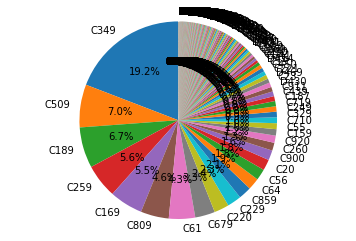

In [19]:
# Generate a pie chart to visualize the proportion of deaths
_fig1, ax1 = plt.subplots()
ax1.pie(table_data.deaths, labels=table_data.cause, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


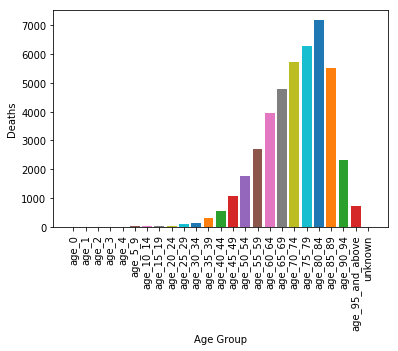

In [20]:
# Are there differences by age group for deaths from Neoplasms (C00-D48) in Australia for 2010
plot_data = sql('select sum(deaths2) as age_0, sum(deaths3) as age_1, sum(deaths4) as age_2, sum(deaths5) as age_3, sum(deaths6) as age_4, sum(deaths7) as age_5_9, sum(deaths8) as age_10_14, sum(deaths9) as age_15_19, sum(deaths10) as age_20_24, sum(deaths11) as age_25_29, sum(deaths12) as age_30_34, sum(deaths13) as age_35_39, sum(deaths14) as age_40_44, sum(deaths15) as age_45_49, sum(deaths16) as age_50_54, sum(deaths17) as age_55_59, sum(deaths18) as age_60_64, sum(deaths19) as age_65_69, sum(deaths20) as age_70_74, sum(deaths21) as age_75_79, sum(deaths22) as age_80_84, sum(deaths23) as age_85_89, sum(deaths24) as age_90_94, sum(deaths25) as age_95_and_above, sum(deaths26) as unknown from mortality_data where cause >= "C00" and cause <= "D48" and year=2010 and country = ' + str(australia_country_code))
for age_group in plot_data:
  plt.bar(age_group, plot_data[age_group])
plt.ylabel('Deaths')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.show()


#Identify the top five age groups in Australia dying with a Neoplasms cause of death.
#looking at graph, top age groups are from most to least, ages 80-84, ages 75-79, ages 70-74, and ages 85-89.


In [21]:
find_population_and_deaths_neoplasms(population_data, mortality_data, australia_country_code)
#using pandasql, finding population and deaths neoplasms using population data, mortality data and australia country code as parameters


,population,deaths
0,11100244.0,43276
1,11197271.0,43276


In [22]:
find_population_and_deaths_neoplasms(population_data, mortality_data, italy_country_code)
#using pandasql, finding population and deaths neoplasms using population data, mortality data and italy country code as parameters

,population,deaths
0,29350339.0,174405
1,31133047.0,174405


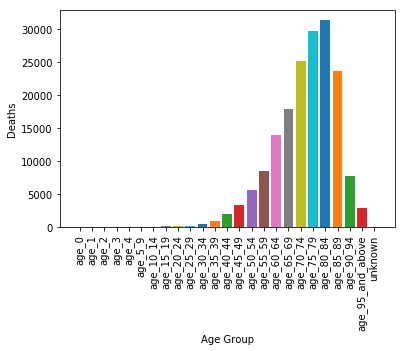

In [23]:
# Are there differences by age group for deaths from Neoplasms (C00-D48) in Italy for 2010
plot_data = sql('select sum(deaths2) as age_0, sum(deaths3) as age_1, sum(deaths4) as age_2, sum(deaths5) as age_3, sum(deaths6) as age_4, sum(deaths7) as age_5_9, sum(deaths8) as age_10_14, sum(deaths9) as age_15_19, sum(deaths10) as age_20_24, sum(deaths11) as age_25_29, sum(deaths12) as age_30_34, sum(deaths13) as age_35_39, sum(deaths14) as age_40_44, sum(deaths15) as age_45_49, sum(deaths16) as age_50_54, sum(deaths17) as age_55_59, sum(deaths18) as age_60_64, sum(deaths19) as age_65_69, sum(deaths20) as age_70_74, sum(deaths21) as age_75_79, sum(deaths22) as age_80_84, sum(deaths23) as age_85_89, sum(deaths24) as age_90_94, sum(deaths25) as age_95_and_above, sum(deaths26) as unknown from mortality_data where cause >= "C00" and cause <= "D48" and year=2010 and country = ' + str(italy_country_code))
for age_group in plot_data:
  plt.bar(age_group, plot_data[age_group])
plt.ylabel('Deaths')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.show()
#Identify the top five age groups in Italy dying with a Neoplasms cause of death.
#looking at graph, top age groups are from most to least, ages 80-84, ages 75-79, ages 70-74, and ages 85-89, so same as Australia.